# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import os
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [196]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=200)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=200)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

142

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [197]:
# url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL

# for city in cities: 
    
#     query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"  
# #     print(query_url)
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
#     pprint(weather_json)




In [242]:
url = "http://api.openweathermap.org/data/2.5/weather?"


lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record = 0
record_set = -1
length = len(cities)
cities_found = []
# from datetime import datetime as dt

for city in cities: 
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city+ "&units=imperial" 
#     print(query_url)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
#     pprint(weather_json)
# place an exception handling here       
    
    try: 
        cities_found.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
       
    
    except:
        print ("city not found")
        record += -1
        
    print(f"{city}")

kaitangata
beitbridge
city not found
illoqqortoormiut
city not found
taolanaro
longyearbyen
nyurba
qaanaaq
mar del plata
city not found
barentsburg
half moon bay
bambous virieux
saint george
vaini
new norfolk
city not found
bolungarvik
iqaluit
saskylakh
pangnirtung
jamestown
georgetown
saint anthony
gizo
avarua
ushuaia
hilo
lompoc
kapaa
omsukchan
tasiilaq
kupang
olafsvik
rikitea
nikolskoye
ferme-neuve
ostrovnoy
kavieng
namibe
cooper city
punta arenas
busselton
mahur
pevek
vestmanna
city not found
old road
honningsvag
houma
weligama
waitati
port alfred
katiola
port elizabeth
champerico
asyut
vila franca do campo
nanortalik
buchanan
hermanus
cherskiy
sao filipe
castro
tiksi
city not found
rungata
yellowknife
chokurdakh
constantine
city not found
cheuskiny
lavrentiya
bonthe
city not found
saleaula
pinawa
exeter
city not found
warqla
bud
san luis
huarmey
severo-kurilsk
maceio
bredasdorp
berlevag
city not found
gurgan
mataura
kununurra
tabas
sinnamary
city not found
marcona
puerto ayora
ger

In [244]:
len(city)

10

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [247]:
weather_data = pd.DataFrame({"City": cities_found,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.28,169.85,55.99,89,100,10.00,NZ,1604115184
1,Beitbridge,-22.22,30.00,69.19,75,20,23.62,ZW,1604115184
2,Longyearbyen,78.22,15.64,17.60,72,20,1.12,SJ,1604115185
3,Nyurba,63.28,118.33,0.73,85,66,3.31,RU,1604115185
4,Qaanaaq,77.48,-69.36,14.04,90,94,6.08,GL,1604115185
...,...,...,...,...,...,...,...,...,...
121,Yenagoa,4.92,6.26,75.45,95,74,3.11,NG,1604115216
122,Faanui,-16.48,-151.75,79.07,74,4,16.24,PF,1604115216
123,Yulara,-25.24,130.99,80.60,11,25,8.05,AU,1604115216
124,Namatanai,-3.67,152.43,84.94,66,97,4.43,PG,1604115216


In [249]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,1.260000e+02
mean,18.633254,11.299921,54.581270,75.984127,55.944444,9.169921,1.604115e+09
std,37.762675,99.884639,24.486295,19.443861,39.449878,6.778578,7.296110e+01
min,-54.800000,-175.200000,-10.070000,11.000000,0.000000,0.650000,1.604115e+09
25%,-13.050000,-73.532500,35.852500,66.000000,17.250000,4.527500,1.604115e+09
50%,21.065000,12.535000,59.240000,81.500000,75.000000,7.975000,1.604115e+09
75%,51.762500,102.220000,75.387500,89.000000,92.000000,12.477500,1.604115e+09
max,78.220000,178.420000,100.400000,100.000000,100.000000,38.450000,1.604115e+09


In [250]:
#writing to a CSV

weather_data.to_csv(output_data_file, index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [218]:
humid_cities = weather_data[weather_data["Humidity"] > 90]

In [217]:
#  Get the indices of cities that have humidity over 100%.
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [204]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data[weather_data["Humidity"] > 90, inplace = False]

SyntaxError: invalid syntax (<ipython-input-204-6d50063811f8>, line 4)

In [131]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

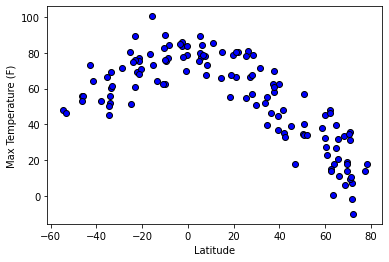

In [251]:
# Generate a scatter plot of latidude vs. Max Temperature

# scatter_plot_df

plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity(%)')

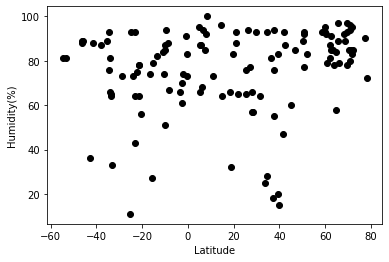

In [252]:
# Generate a scatter plot of latidude vs. Humidity

# scatter_plot_df

plt.scatter(lat, humidity, marker="o", facecolors="black", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness(%)')

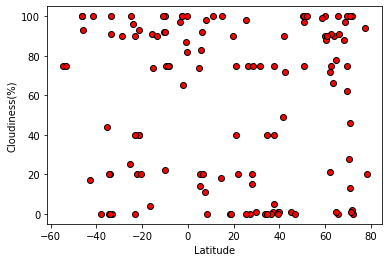

In [253]:
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

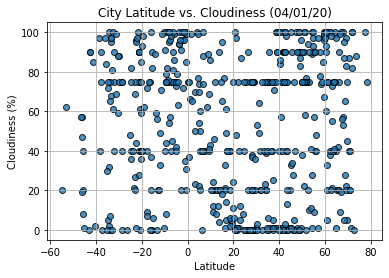

In [12]:
#provided home hint

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

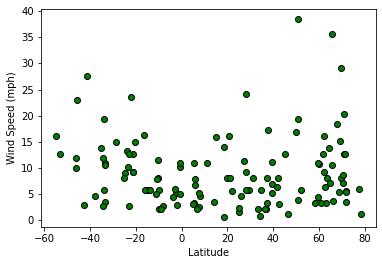

In [254]:
plt.scatter(lat, wind_speed, marker="o", facecolors="green", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

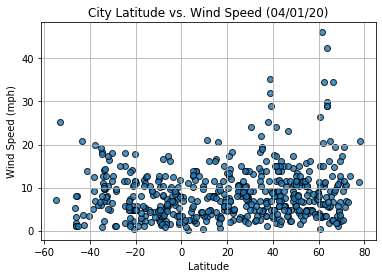

In [13]:
#provided hint

## Linear Regression

In [257]:
weather_data.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

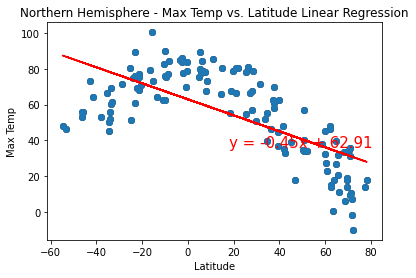

In [276]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black")
weather_data
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

# norther_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


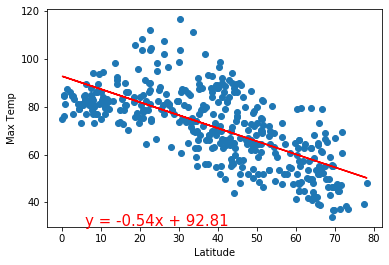

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


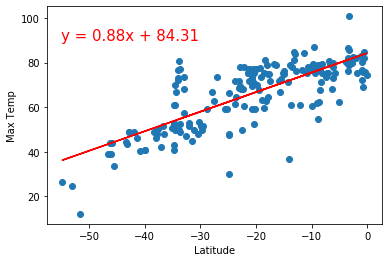

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


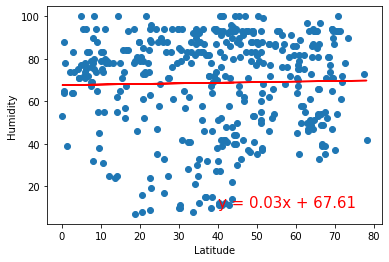

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


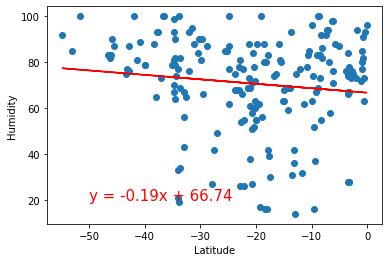

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


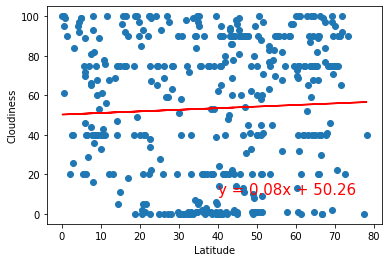

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


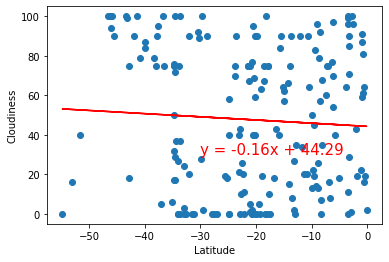

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


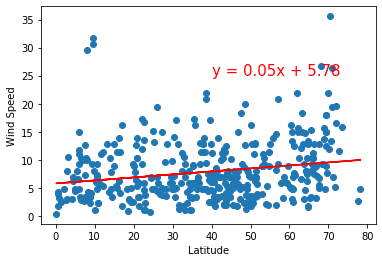

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


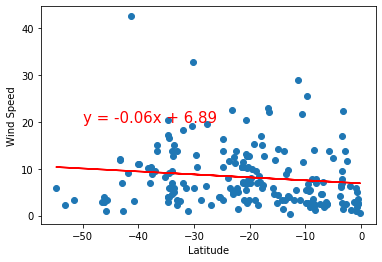